In [1]:
%run helper.py

## Heatmap

In [2]:
df = pd.read_csv("../data/election-results_statistics-finland.csv").query("Sex == 'Total'")
df.rename(columns={"Votes cast (number)":"Votes", "Constituency and municipality in the election year":"Constituency"}, inplace=True)
df = df.query("Votes != '.'")
df.Votes = df.Votes.astype(int)
df = df.query("Votes > 10000").sort_values("Votes")
df

,Year,Sex,Party,Constituency,Votes
278,1999,Total,KaL,Whole country,10104
344,2003,Total,KaL,Whole country,11485
542,2015,Total,KaL,Whole country,13638
670,2023,Total,LIBE,Whole country,14982
473,2011,Total,Pirate Pty,Whole country,15103
...,...,...,...,...,...
332,2003,Total,SDP,Whole country,683223
333,2003,Total,KESK,Whole country,689391
68,1987,Total,SDP,Whole country,695331
200,1995,Total,SDP,Whole country,785637


In [3]:
df_pivot = df.pivot(index="Year", columns="Party", values="Votes").fillna(0)
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0).T

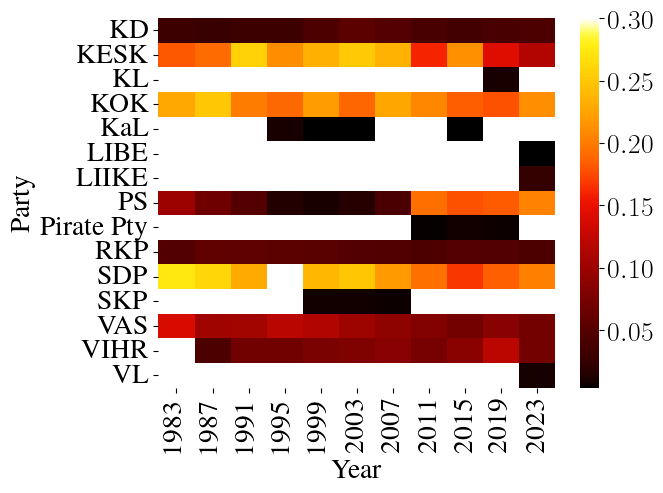

In [4]:
sns.heatmap(df_pivot, mask=df_pivot == 0, xticklabels=1, yticklabels=1, cmap=cc.fire)
plt.savefig("../figures/heatmap-elections_finland.pdf", bbox_inches="tight", transparent=True)